In [6]:
import pandas as pd
import yfinance as yf

In [7]:
df = yf.download('TATAMOTORS.NS', '2010-01-01', '2021-06-24')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,156.303482,164.040497,156.184769,163.535919,153.140778,27906448
2010-01-05,162.259598,167.147186,153.246277,160.686478,150.472488,23669317
2010-01-06,162.200241,162.932388,159.311234,160.933823,150.704086,14990820
2010-01-07,161.171280,161.923218,154.344498,155.432831,145.552780,22722030
2010-01-08,156.323273,159.251862,155.343781,156.283707,146.349548,16495776
...,...,...,...,...,...,...
2021-06-17,348.399994,352.899994,342.250000,345.649994,345.649994,29236974
2021-06-18,345.649994,346.899994,329.000000,337.399994,337.399994,49440514
2021-06-21,330.899994,335.799988,326.200012,334.299988,334.299988,29123887


In [9]:
lags = 5
cols =[]
for lag in range(1, lags+1):
    col = f'lag_{lag}'
    df[col] = df['Adj Close'].shift(lag)
    cols.append(col)
df.dropna(inplace=True)
reg = np.linalg.lstsq(df[cols], df['Adj Close'], rcond=None)[0]
reg

array([ 1.02509513, -0.0647352 ,  0.02889432, -0.01606723,  0.02672966])

<AxesSubplot:xlabel='Date'>

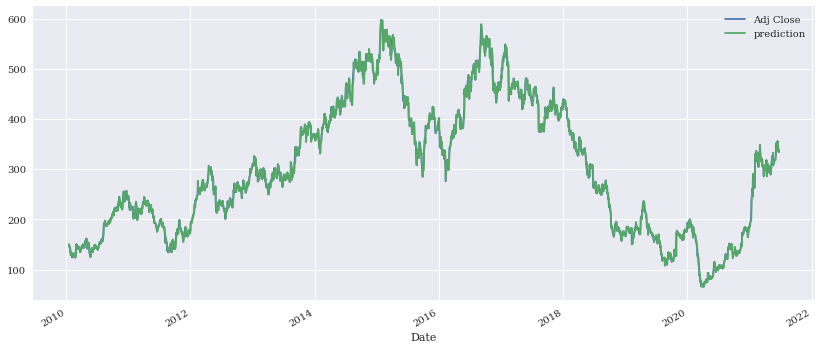

In [10]:
df['prediction'] = np.dot(df[cols], reg)
df[['Adj Close', 'prediction']].plot(figsize=(14,6))

<AxesSubplot:xlabel='Date'>

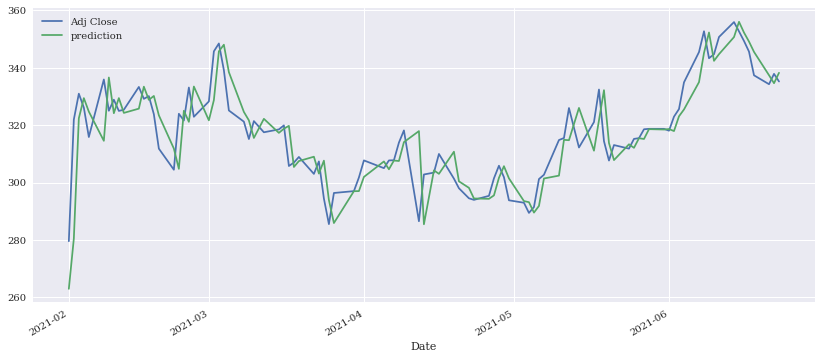

In [16]:
df[['Adj Close', 'prediction']].loc['2021-02-01':].plot(figsize=(14,6))

In [17]:
df['return'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
df.dropna(inplace = True)
cols = []
for lag in range(1, lags+1):
    col = f'lag_{lag}'
    df[col] = df['return'].shift(lag)
    cols.append(col)
    df.dropna(inplace = True)
    
reg = np.linalg.lstsq(df[cols], df['return'], rcond=None)[0]
reg

array([ 0.02369795,  0.0017577 , -0.00769832, -0.01763332,  0.00525941])

<AxesSubplot:xlabel='Date'>

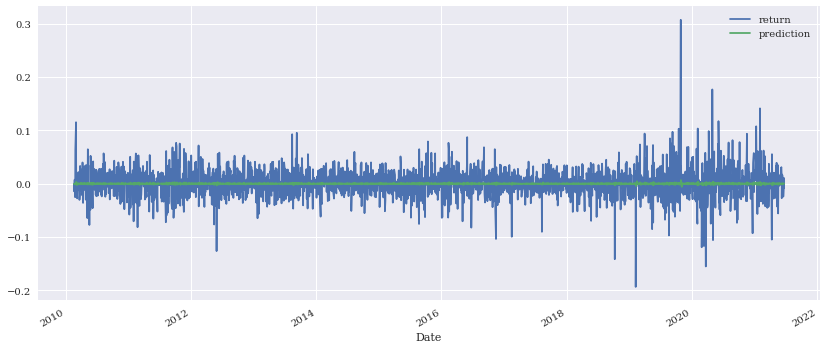

In [19]:
df['prediction'] = np.dot(df[cols], reg)
df[['return', 'prediction']].iloc[lags:].plot(figsize=(14,6))